# Explore

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud

In [2]:
#Acquire prepped data

df = pd.read_csv('cleaned_readmes_v2.csv', index_col = 0)
df.head()

,repo,language,content
0,microsoft/react-native-windows,C++,h1 aligncenter react native window h1 p alignc...
1,microsoft/fast,TypeScript,fastbannergithub914pnghttpsstaticfastdesignass...
2,microsoft/Application-Insights-Workbooks,JSON,azure monitor workbook template statushttpsgit...
3,microsoft/gctoolkit,Java,microsoft gctoolkit gctoolkit set library anal...
4,microsoft/winget-cli-restsource,C#,welcome wingetclirestsource repository buildin...


In [3]:
df['is_TypeScript'] = df.language == 'TypeScript'
df.head()

,repo,language,content,is_TypeScript
0,microsoft/react-native-windows,C++,h1 aligncenter react native window h1 p alignc...,False
1,microsoft/fast,TypeScript,fastbannergithub914pnghttpsstaticfastdesignass...,True
2,microsoft/Application-Insights-Workbooks,JSON,azure monitor workbook template statushttpsgit...,False
3,microsoft/gctoolkit,Java,microsoft gctoolkit gctoolkit set library anal...,False
4,microsoft/winget-cli-restsource,C#,welcome wingetclirestsource repository buildin...,False


In [4]:
#Splitting data
trainvalidate, test = train_test_split(df,stratify=df.is_TypeScript, test_size=.2)

train, validate = train_test_split(trainvalidate,stratify=trainvalidate.is_TypeScript, test_size=.2)


In [5]:
train.shape, validate.shape, test.shape

((880, 4), (220, 4), (276, 4))

In [6]:
#Take a look at the count and percentage of words 
languages = pd.concat([train.language.value_counts(),
                    train.language.value_counts(normalize=True)], axis=1)
languages.columns = ['n', 'percent']
languages

,n,percent
TypeScript,226,0.256818
C#,157,0.178409
Python,112,0.127273
C++,68,0.077273
JavaScript,60,0.068182
PowerShell,52,0.059091
C,33,0.037500
Jupyter Notebook,33,0.037500
HTML,23,0.026136
Go,16,0.018182


In [7]:
train.head()

,repo,language,content,is_TypeScript
1105,microsoft/powerbi-visuals-mekkochart,TypeScript,powerbivisualsmekkochart statushttpstraviscior...,True
238,microsoft/Azure_Kinect_ROS_Driver,C++,azure kinect ro driver project node publishes ...,False
192,microsoft/unilm,Python,unilm ai pretrained model natural language und...,False
870,microsoft/vscode-emmet-helper,TypeScript,vscodeemmethelper helper module emmet module v...,True
1277,microsoft/glue,Jupyter Notebook,img srcassetsimggluelogopng altglue width400px...,False


In [8]:
TS_words = ' '.join(train[train.language == 'TypeScript'].content.astype('str')).split()

In [9]:
NTS_words = ' '.join(train[train.language != 'TypeScript'].content.astype('str')).split()
all_words = ' '.join(train.content.astype('str')).split()

In [10]:
TS_freq = pd.Series(TS_words).value_counts()
NTS_freq = pd.Series(NTS_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

all_freq.head()

'            5543
project      3230
microsoft    2842
run          2120
see          1818
dtype: int64

In [11]:
word_counts = (pd.concat([all_freq, TS_freq, NTS_freq], axis=1, sort=True)
                .set_axis(['all', 'TS', 'NTS'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,TS,NTS
&#9;,1085,385,700
',5543,1917,3626
0,264,18,246
00,79,2,77
000,17,0,17


In [12]:
# word_counts = (pd.concat([all_freq, TS_freq, NTS_freq], axis=1, sort=True)
#                 .set_axis(['all', 'TS', 'NTS'], axis=1)
#                 .fillna(0))

#word_counts.head(100)

In [13]:
train.isna().sum()

repo             0
language         0
content          3
is_TypeScript    0
dtype: int64

Text(0.5, 1.0, 'Proportion of Non-TypeScript vs TypeScript for the 20 most common words')

<Figure size 864x576 with 0 Axes>

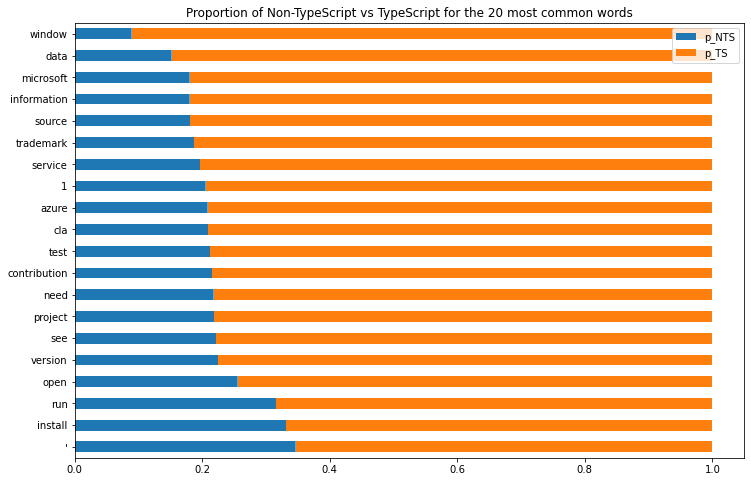

In [14]:
plt.figure(figsize = (12, 8))

# figure out the percentage
(word_counts
 .assign(p_TS=word_counts.NTS / word_counts['all'],
         p_NTS=word_counts.TS / word_counts['all'])
 .sort_values(by='all')
 [['p_NTS', 'p_TS']]
 .tail(20)
 .sort_values('p_TS')
 .plot.barh(stacked=True,figsize = (12, 8)))



plt.title('Proportion of Non-TypeScript vs TypeScript for the 20 most common words')

In [15]:
(word_counts
 [(word_counts.NTS > 10) & (word_counts.TS > 10)]
 .assign(ratio=lambda df: df.NTS / (df.TS + .01))
 .sort_values(by='ratio')
 .pipe(lambda df: pd.concat([df.head(), df.tail()])))

,all,TS,NTS,ratio
chart,149,126,23,0.182525
yarn,234,193,41,0.212424
survey,55,44,11,0.249943
typescript,301,235,66,0.280839
vscode,97,75,22,0.293294
learning,400,25,375,14.994002
powershell,443,25,418,16.713315
model,1242,67,1175,17.534696
dataset,261,13,248,19.062260
10,273,11,262,23.796549


Text(0.5, 1.0, 'Proportion of TypeScript vs Non-TypeScript for the 20 most common words')

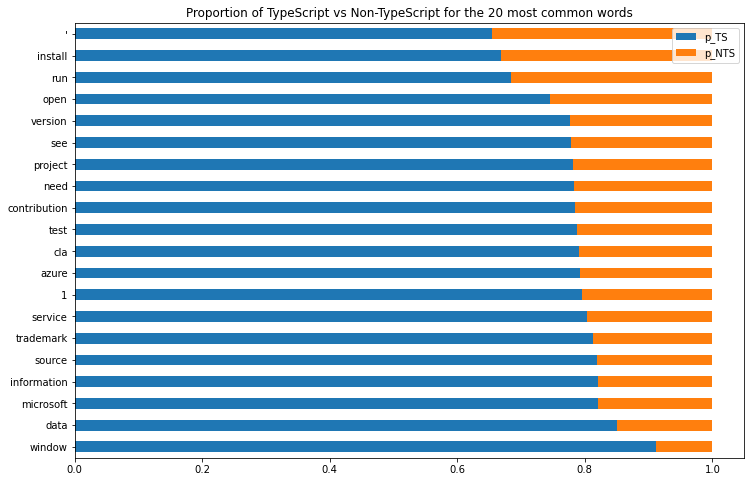

In [16]:
# figure out the percentage
(word_counts
 .assign(p_NTS=word_counts.TS / word_counts['all'],
         p_TS=word_counts.NTS / word_counts['all'])
 .sort_values(by='all')
 [['p_TS', 'p_NTS']]
 .tail(20)
 .sort_values('p_NTS')
 .plot.barh(stacked=True,figsize = (12, 8)))



plt.title('Proportion of TypeScript vs Non-TypeScript for the 20 most common words')

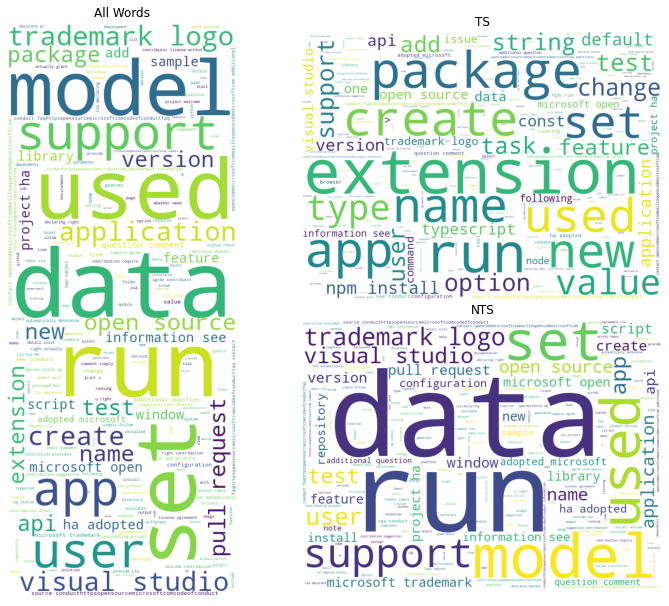

In [17]:
#Create Word Clouds 

all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
TS_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(TS_words))
NTS_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(NTS_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(TS_cloud)
axs[2].imshow(NTS_cloud)

axs[0].set_title('All Words')
axs[1].set_title('TS')
axs[2].set_title('NTS')

for ax in axs: ax.axis('off')

In [18]:
#Bi-grams

top_20_TS_bigrams = (pd.Series(nltk.ngrams(TS_words, 2))
                      .value_counts()
                      .head(20))

top_20_TS_bigrams

(&#9;, &#9;)                                                    236
(', ')                                                          230
(npm, install)                                                  170
(open, source)                                                  150
(visual, studio)                                                147
(trademark, logo)                                               143
(microsoft, open)                                               139
(information, see)                                              135
(project, ha)                                                   131
(source, conducthttpsopensourcemicrosoftcomcodeofconduct)       129
(ha, adopted)                                                   128
(adopted, microsoft)                                            127
(npm, run)                                                      127
(question, comment)                                             125
(conduct, faqhttpsopensourcemicrosoftcomcodeofco

In [19]:
top_20_NTS_bigrams = (pd.Series(nltk.ngrams(NTS_words, 2))
                      .value_counts()
                      .head(20))

top_20_NTS_bigrams

(trademark, logo)                                                 600
(visual, studio)                                                  571
(open, source)                                                    554
(pull, request)                                                   540
(microsoft, open)                                                 469
(project, ha)                                                     446
(information, see)                                                446
(ha, adopted)                                                     438
(adopted, microsoft)                                              437
(question, comment)                                               436
(additional, question)                                            432
(source, conducthttpsopensourcemicrosoftcomcodeofconduct)         430
(see, conduct)                                                    430
(contact, opencodemicrosoftcommailtoopencodemicrosoftcom)         418
(opencodemicrosoftco

In [20]:
top_20_all_bigrams = (pd.Series(nltk.ngrams(all_words, 2))
                      .value_counts()
                      .head(20))

top_20_all_bigrams

(trademark, logo)                                                 743
(visual, studio)                                                  718
(open, source)                                                    704
(pull, request)                                                   659
(microsoft, open)                                                 608
(information, see)                                                581
(project, ha)                                                     577
(ha, adopted)                                                     566
(adopted, microsoft)                                              564
(question, comment)                                               561
(source, conducthttpsopensourcemicrosoftcomcodeofconduct)         559
(additional, question)                                            556
(see, conduct)                                                    554
(contact, opencodemicrosoftcommailtoopencodemicrosoftcom)         542
(conduct, faqhttpsop

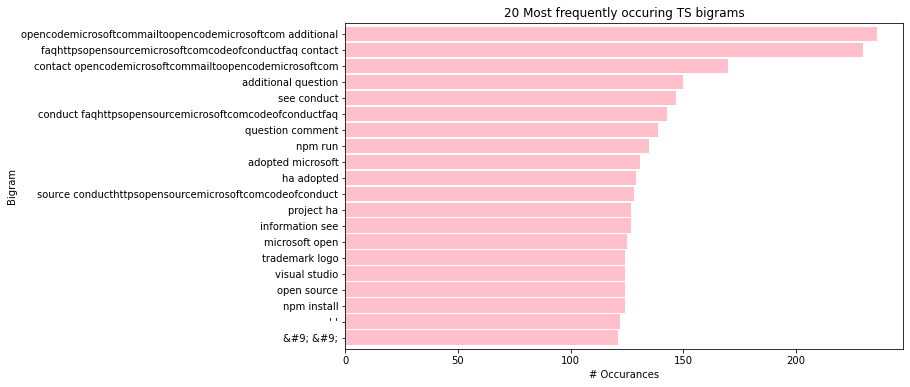

In [21]:
top_20_TS_bigrams.sort_values().plot.barh(color='pink', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring TS bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_TS_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

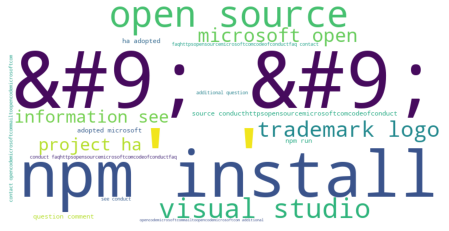

In [22]:
#Bigram Word Clouds

# We can supply our own values to be used to determine how big the words (or
# phrases) should be through the `generate_from_frequencies` method. The
# supplied values must be in the form of a dictionary where the keys are the
# words (phrases), and the values are numbers that correspond to the sizes.
#
# We'll convert our series to a dictionary, and convert the tuples that make up
# the index into a single string that holds each phrase.


data = {k[0] + ' ' + k[1]: v for k, v in top_20_TS_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

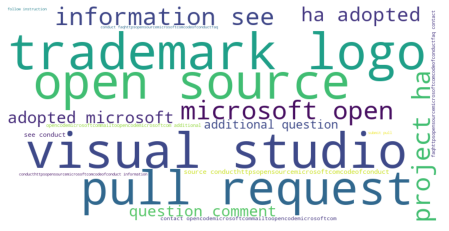

In [23]:
data = {k[0] + ' ' + k[1]: v for k, v in top_20_NTS_bigrams.to_dict().items()}
img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
plt.figure(figsize=(8, 4))
plt.imshow(img)
plt.axis('off')
plt.show()

In [24]:
# Does the length of the README vary by programming language?

df.groupby('language').content.size()

language
AL                    2
ANTLR                 1
Assembly              1
Batchfile             1
Bicep                 1
C                    44
C#                  242
C++                 112
CMake                 1
CSS                   9
CodeQL                1
Dafny                 1
Dart                  1
Dockerfile           13
F#                    4
Go                   19
HCL                   6
HTML                 37
Handlebars            1
JSON                  1
Java                 27
JavaScript           92
Julia                 2
Jupyter Notebook     45
Kotlin                7
Liquid                1
MATLAB                1
Makefile              1
Mustache              1
Objective-C           4
Objective-C++         1
PHP                  12
PLpgSQL               3
PowerShell           76
Python              176
Q#                    1
R                     3
Rich Text Format      1
Roff                  2
Ruby                 11
Rust                 12
SCSS   

In [25]:
train.content.str.len()

1105     1546.0
238      2289.0
192     13720.0
870       486.0
1277    19579.0
         ...   
355      2482.0
639      6934.0
1024      760.0
1358     2086.0
1256     1978.0
Name: content, Length: 880, dtype: float64

In [26]:
train['readme_char_count'] = train.content.str.len()
train.head()

,repo,language,content,is_TypeScript,readme_char_count
1105,microsoft/powerbi-visuals-mekkochart,TypeScript,powerbivisualsmekkochart statushttpstraviscior...,True,1546.0
238,microsoft/Azure_Kinect_ROS_Driver,C++,azure kinect ro driver project node publishes ...,False,2289.0
192,microsoft/unilm,Python,unilm ai pretrained model natural language und...,False,13720.0
870,microsoft/vscode-emmet-helper,TypeScript,vscodeemmethelper helper module emmet module v...,True,486.0
1277,microsoft/glue,Jupyter Notebook,img srcassetsimggluelogopng altglue width400px...,False,19579.0


In [27]:
train['readme_word_count'] = train.content.str.split().str.len()

In [28]:
# Get a list of the unique words
unique_words = pd.Series(' '.join(train.content.astype('str')).split()).value_counts()
unique_words

'                                                                         5543
project                                                                   3230
microsoft                                                                 2842
run                                                                       2120
see                                                                       1818
                                                                          ... 
codeqlhttpsgithubcommicrosoftrecursiveextractorworkflowscodeqlbadgesvg       1
authetication                                                                1
azdcapclient                                                                 1
apidocsapidocumentationmd                                                    1
architecturehttpfacebookgithubioreactblog20140506fluxhtml                    1
Length: 44589, dtype: int64

In [29]:
word_counts

,all,TS,NTS
&#9;,1085,385,700
',5543,1917,3626
0,264,18,246
00,79,2,77
000,17,0,17
...,...,...,...
zulu,1,0,1
zuo,1,0,1
zuredeploysandboxjson,1,0,1
zwnobyaiig0kzwnobyaisgvsbg8idqply2hvicjhb29kynllig,2,0,2


In [30]:
train.groupby('language')['readme_char_count','readme_word_count'].mean().sort_values(by='readme_word_count')

,readme_char_count,readme_word_count
language,,
Makefile,90.000000,11.000000
Dafny,140.000000,15.000000
PLpgSQL,640.000000,65.000000
TeX,1164.000000,121.000000
Bicep,1367.000000,147.000000
SCSS,1569.500000,148.500000
CodeQL,1470.000000,150.000000
VBScript,1437.000000,153.000000
HCL,2432.250000,223.750000


In [33]:
train.groupby('language')['readme_char_count','readme_word_count'].mean()

,readme_char_count,readme_word_count
language,,
AL,2511.000000,253.000000
Assembly,5119.000000,697.000000
Bicep,1367.000000,147.000000
C,5051.575758,523.666667
C#,4966.564103,471.288462
C++,4755.308824,469.955882
CSS,2119.800000,245.600000
CodeQL,1470.000000,150.000000
Dafny,140.000000,15.000000
